In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(1279.5), np.float64(757.5), np.float64(-0.5))

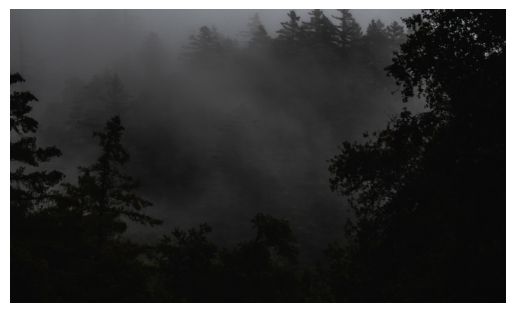

In [22]:
image = cv.imread("Gambar/Pertemuan 7/Hutan-Gelap.jpeg")
plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.axis('off')

In [23]:
alpha = 1.5
beta = 100

(np.float64(-0.5), np.float64(1279.5), np.float64(757.5), np.float64(-0.5))

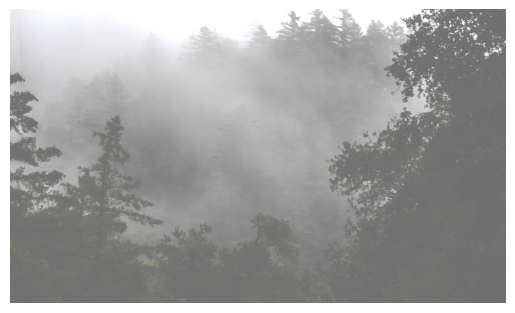

In [24]:
adjusted = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
plt.imshow(cv.cvtColor(adjusted, cv.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(719.5), np.float64(414.5), np.float64(-0.5))

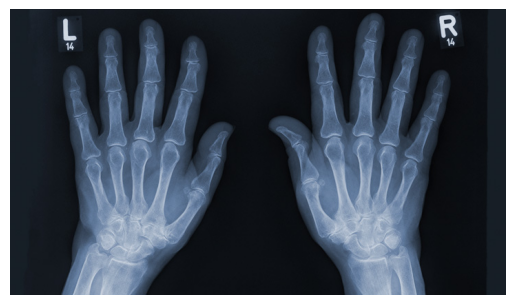

In [25]:
image2 = cv.imread("Gambar/Pertemuan 8/hand_xray.jpg")
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.axis('off')

In [26]:
# KONVERSI IMAGE MENJADI NEGATIF

height, width, _ = image2.shape
for i in range(height - 1, -1, -1):
    for j in range(width - 1, -1, -1):
        # MENGAMBIL NILAI SUATU PIXEL
        pixel = image2[i, j]

        # MENGURANGI NILAINYA DENGAN 255
        pixel[0] = 255 - pixel[0]  # BLUE CHANNEL
        pixel[1] = 255 - pixel[1]  # GREEN CHANNEL
        pixel[2] = 255 - pixel[2]  # RED CHANNEL

        image2[i, j] = pixel

(np.float64(-0.5), np.float64(719.5), np.float64(414.5), np.float64(-0.5))

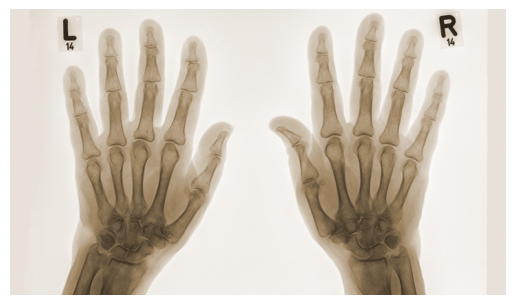

In [27]:
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.axis('off')

In [28]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i/255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

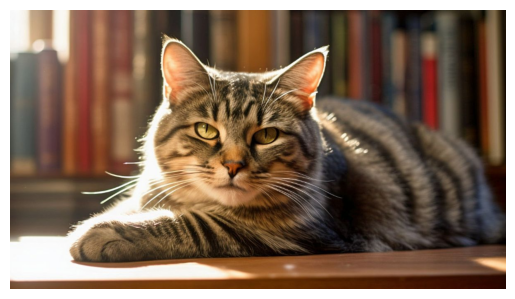

In [29]:
original = cv.imread("Gambar/gambar-kucing.jpg")
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

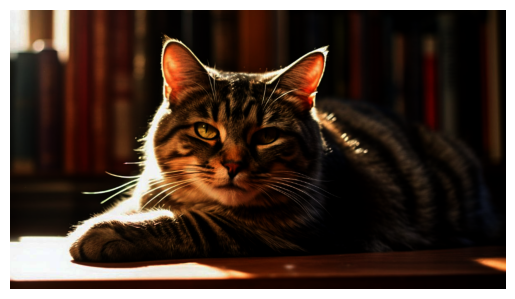

In [30]:
gamma = 0.4
adjusted = adjust_gamma(original, gamma=gamma)

plt.imshow(cv.cvtColor(adjusted, cv.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

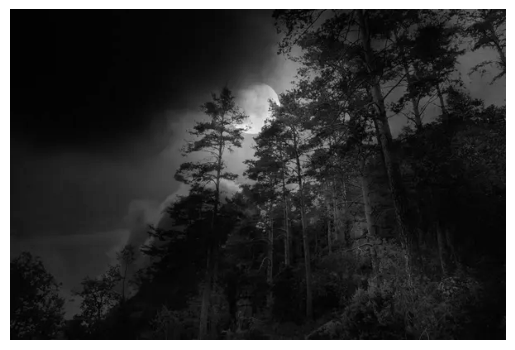

In [38]:
dark_image = cv.imread("Gambar/Pertemuan 8/dark_image.jpg", 0)
plt.imshow(dark_image, cmap="gray")
plt.axis('off')

In [32]:
min_val, max_val, _, _ = cv.minMaxLoc(dark_image)

In [33]:
if max_val != min_val:
    alpha = 255.0 / (max_val - min_val)
    beta = -alpha * min_val
    table = np.array([np.clip(alpha * i + beta, 0, 255)
                      for i in range(256)]).astype("uint8")

else:
    table = np.arange(256, dtype="uint8")

In [34]:
image_contrast = cv.LUT(dark_image, table)

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

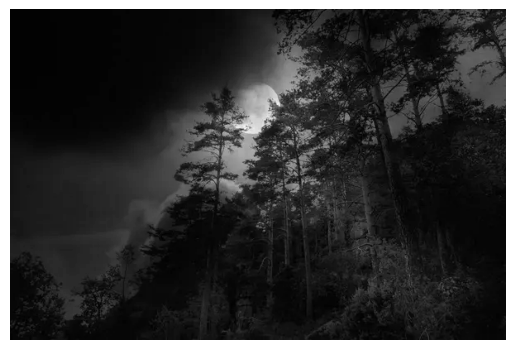

In [39]:
plt.imshow(image_contrast, cmap="gray")
plt.axis('off')